# 样本统计量的性质

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

In [3]:
population = stats.norm(loc=4, scale=0.8)
population

In [4]:
# 多次计算样本均值

sample_mean_array = np.zeros(10000)
sample_std_array = np.zeros(10000)

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)
    sample_std_array[i] = np.std(sample, ddof=1)

sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [5]:
sample_std_array

array([1.004, 0.843, 0.655, ..., 0.843, 1.093, 0.92 ])

In [6]:
np.mean(sample_mean_array)

4.004

In [7]:
np.mean(sample_std_array)

0.777

<Axes: ylabel='Count'>

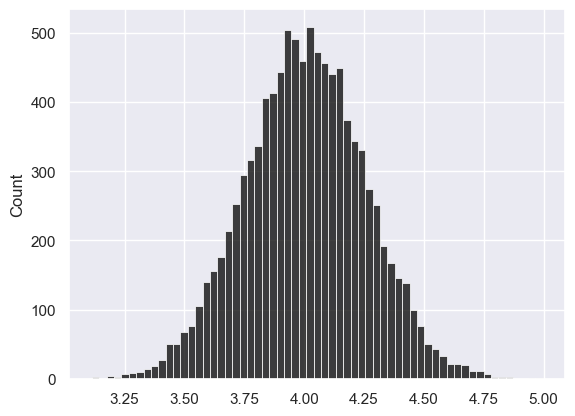

In [8]:
sns.histplot(sample_mean_array, color='black')

## 样本容量越大，样本均值越接近总体均值

In [9]:
size_array = np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

Text(0, 0.5, 'sample mean')

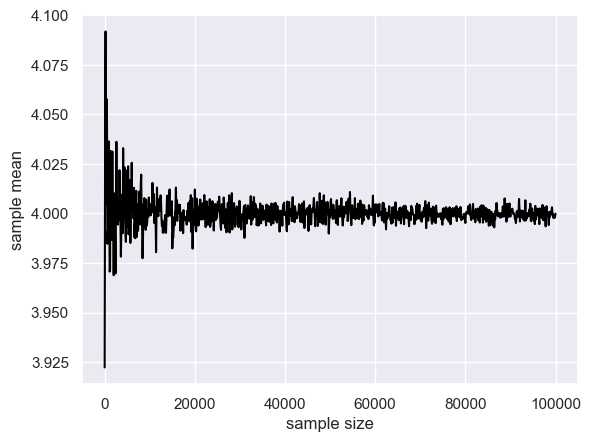

In [10]:
sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [11]:
def calc_sample_mean(size, n_trial): # 计算样本均值的函数，size样本容量，n_trial试验次数
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return (sample_mean_array)

np.random.seed(1)
np.mean(calc_sample_mean(size=10, n_trial=10000))

4.004

In [12]:
# 不同样本容量所得的样本均值的分布

np.random.seed(1)

size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    "sample_mean": size_10,
    "size"       : np.tile("size 10", 10000)
})

size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    "sample_mean": size_20,
    "size"       : np.tile("size 20", 10000)
})

size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean": size_30,
    "size"       : np.tile("size 30", 10000)
})

sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df]
)

sim_result.head()

,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10


<Axes: xlabel='size', ylabel='sample_mean'>

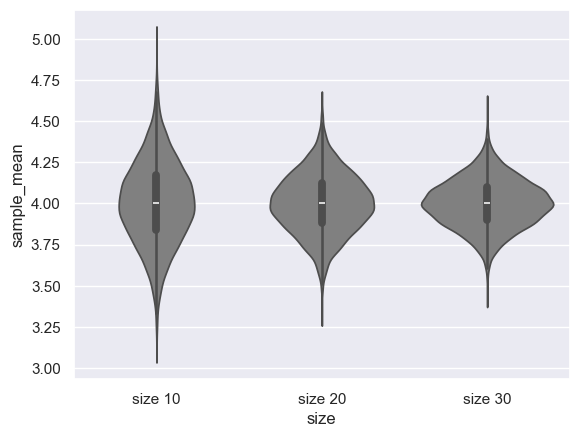

In [13]:
# 小提琴图输出图形

sns.violinplot(x="size", y="sample_mean",
    data=sim_result, color="gray")

In [14]:
# 样本均值标准差小于总体标准差

size_array = np.arange(
    start=2, stop=102, step=2
)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

Text(0, 0.5, 'mean_std value')

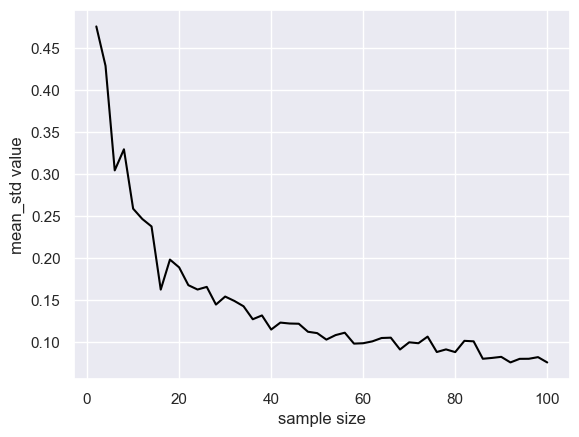

In [15]:
sample_mean_std_array = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [16]:
# 标准误差

standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

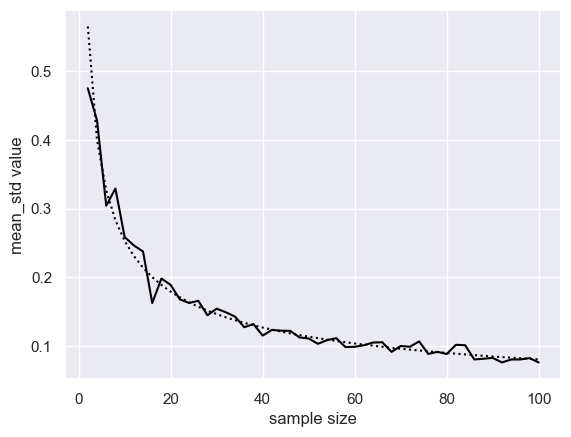

In [17]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [19]:
# 样本方差的均值偏离总体方差

sample_var_array = np.zeros(10000)

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=0)

np.mean(sample_var_array)

0.575

In [20]:
# 无偏方差消除偏离

unbias_var_array = np.zeros(10000)

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample, ddof=1)
np.mean(unbias_var_array)

0.639

Text(0, 0.5, 'unbias var')

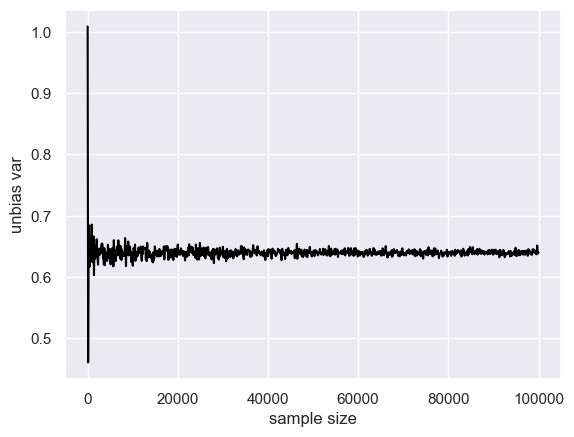

In [22]:
# 样本容量越大，其无偏方差越接近总体方差

size_array = np.arange(
    start=10, stop=100100, step=100)

unbias_var_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)

plt.plot(size_array, unbias_var_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

* 无偏性：估计量的期望值相当于真正的参数的特性
* 一致性：样本容量越大，估计量越接近真正的参数的特性
* 大数定律：样本容量越大，样本均值越接近总体均值
* 中心极限定理：对于任意总体分布，样本容量越大，随机变量的和的分布越接近正态分布

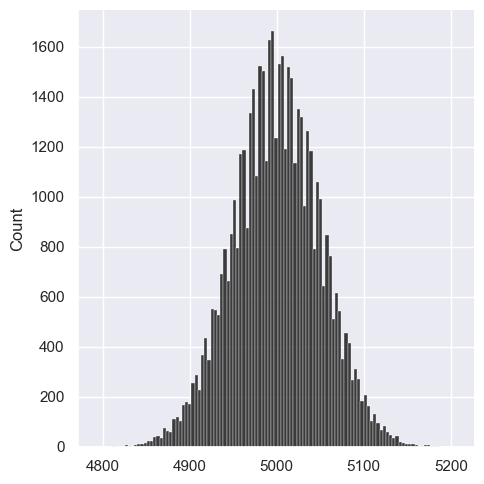

In [23]:
# 中心极限定理

n_size = 10000
n_trial = 50000

coin = np.array([0, 1])
count_coin = np.zeros(n_trial)
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size=n_size, replace=True))

sns.displot(count_coin, color="black")